In [323]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [347]:
file_path = 'Agricultural2_data.csv'

In [348]:
df = pd.read_csv(file_path, delimiter=';')
print(df)

        Date  Temperature  Humidity  Soil_moisture  Crop_yield
0   01.02.24           15        65             20        3000
1   02.02.24           16        64             21        3100
2   03.02.24           15        66             19        3150
3   04.02.24           17        70             22        3200
4   05.02.24           14        60             20        3150
5   06.02.24           18        59             23        3300
6   07.02.24           19        58             24        3350
7   08.02.24           15        55             25        3400
8   09.02.24           20        53             26        3450
9   10.02.24           21        50             27        3500
10  11.02.24           29        48             28        3550
11  12.02.24           25        47             29        3600
12  13.02.24           26        45             30        3650
13  14.02.24           21        44             31        3700
14  15.02.24           26        42             32     

In [326]:
df.drop('Date',axis = 1, inplace = True)

In [349]:
df.head(10)

,Date,Temperature,Humidity,Soil_moisture,Crop_yield
0,01.02.24,15,65,20,3000
1,02.02.24,16,64,21,3100
2,03.02.24,15,66,19,3150
3,04.02.24,17,70,22,3200
4,05.02.24,14,60,20,3150
5,06.02.24,18,59,23,3300
6,07.02.24,19,58,24,3350
7,08.02.24,15,55,25,3400
8,09.02.24,20,53,26,3450
9,10.02.24,21,50,27,3500


In [328]:
print(df.columns)

Index(['Temperature', 'Humidity', 'Soil_moisture', 'Crop_yield'], dtype='object')


In [329]:
df.describe()

,Temperature,Humidity,Soil_moisture,Crop_yield
count,20.000000,20.000000,20.000000,20.000000
mean,20.250000,50.700000,27.600000,3517.500000
std,4.865291,10.930883,5.761944,305.766939
min,14.000000,35.000000,19.000000,3000.000000
25%,16.000000,41.500000,22.750000,3275.000000
50%,19.500000,49.000000,27.500000,3525.000000
75%,23.500000,59.250000,32.250000,3762.500000
max,30.000000,70.000000,37.000000,4000.000000


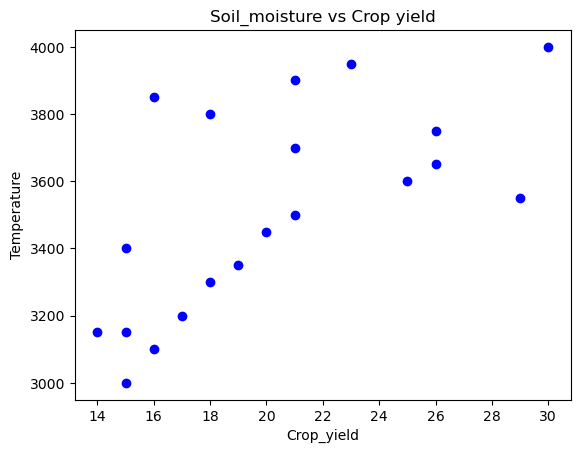

In [330]:
plt.scatter(df['Temperature'], df['Crop_yield'], color = 'blue')
plt.title('Soil_moisture vs Crop yield')
plt.ylabel('Temperature')
plt.xlabel('Crop_yield')
#plt.box(False)
plt.show()
     


In [331]:
# Splitting variables
X = df.iloc[:, :1]  # independent
y = df.iloc[:, 1:]  # dependent

In [332]:
X = df[['Temperature', 'Humidity', 'Soil_moisture']]
y = df['Crop_yield']

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [334]:
#Regression model 
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [335]:
# Make predictions
y_pred = model.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [336]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8064.2523460287475


In [337]:
y_pred_train = model.predict(X_train)


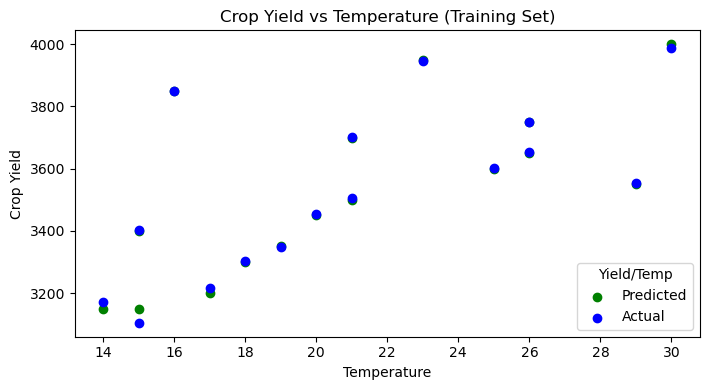

In [345]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_train['Temperature'], y_train, color='green')
plt.scatter(X_train['Temperature'], y_pred_train, color='blue')
plt.title('Crop Yield vs Temperature (Training Set)')
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')
plt.legend(['Predicted', 'Actual'], title='Yield/Temp', loc='best', facecolor='white')
#plt.box(False)

plt.tight_layout()
plt.show()

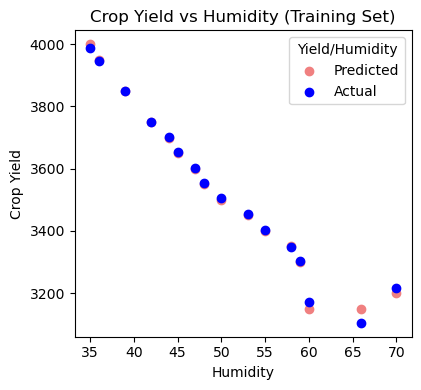

In [350]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 2)
plt.scatter(X_train['Humidity'], y_train, color='lightcoral')
plt.scatter(X_train['Humidity'], y_pred_train, color='blue')
plt.title('Crop Yield vs Humidity (Training Set)')
plt.xlabel('Humidity')
plt.ylabel('Crop Yield')
plt.legend(['Predicted', 'Actual'], title='Yield/Humidity', loc='best', facecolor='white')
#plt.box(False)




plt.tight_layout()
plt.show()

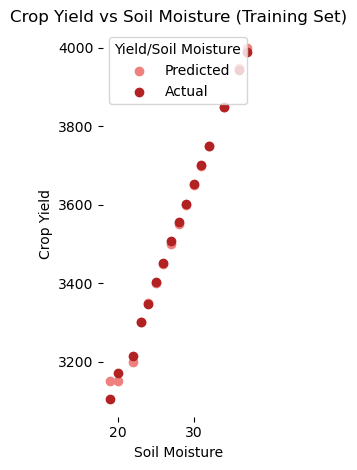

In [340]:
# Plot Soil Moisture vs Crop Yield (Training Set)
plt.subplot(1, 3, 3)
plt.scatter(X_train['Soil_moisture'], y_train, color='lightcoral')
plt.scatter(X_train['Soil_moisture'], y_pred_train, color='firebrick')
plt.title('Crop Yield vs Soil Moisture (Training Set)')
plt.xlabel('Soil Moisture')
plt.ylabel('Crop Yield')
plt.legend(['Predicted', 'Actual'], title='Yield/Soil Moisture', loc='best', facecolor='white')
plt.box(False)


plt.tight_layout()
plt.show()

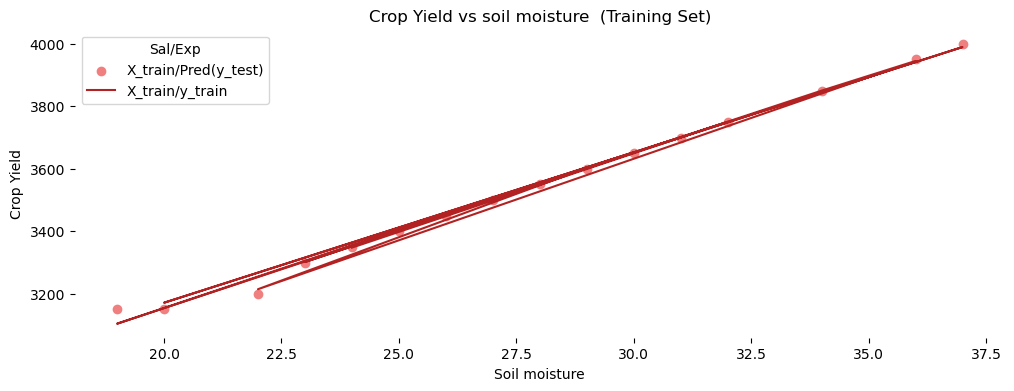

In [341]:
plt.figure(figsize=(12, 4))
plt.scatter(X_train['Soil_moisture'], y_train, color = 'lightcoral')
plt.plot(X_train['Soil_moisture'], y_pred_train, color = 'firebrick')
plt.title('Crop Yield vs soil moisture  (Training Set)')
plt.xlabel('Soil moisture')
plt.ylabel('Crop Yield')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [342]:
# Output the RMSE and coefficients
output = {
    "RMSE": rmse,
    "Coefficients": model.coef_,
    "Intercept": model.intercept_
}